# Area_MJHW9_ANAT0015

# README

## Dataset

The Excel sheet `AreaIntensity.xlsx` contains time-series intensity measurements from single B16F1 cells expressing various GFP-tagged constructs:

- EGFP  
- EGFP-WAVE2  
- StayGold-E138D-WAVE2  
- mStayGold2-WAVE2  

The intensity values (AT1–AT31) were recorded over a 5-minute period with 30 intervals (31 time points), measuring signal from whole-cell areas.

## Processing Overview

1. **Normalization**: Each cell’s time-series data was normalized to its first time point (AT1), allowing fair comparison of photobleaching behavior.  

2. **Cell Selection**: Four representative cells (IDs: 101, 51, 24, 12) were manually selected, one for each fluorophore condition. 

3. **Plotting**: Line plots were generated to visualize normalized fluorescence decay over time (0–300s).

# Coding Script

## Data Import

In [1]:
# Package Import
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Data Import
AreaIntensity = pd.read_excel("AreaIntensity.xlsx", sheet_name="Sheet1")

## Cleaning and Preprocessing

In [3]:
# Convert CellNo to Str
AreaIntensity["CellNo"] = (
    AreaIntensity["CellNo"]
    .astype("string")                   
    .str.replace(r"\.0$", "", regex=True) 
)

In [4]:
# Normalisation
for i in range(1, 32):
    col_name = f"AT{i}"
    norm_col = f"AT{i}Per"
    
    if col_name in AreaIntensity.columns:
        AreaIntensity[norm_col] = AreaIntensity[col_name] / AreaIntensity["AT1"]

## Visulisation

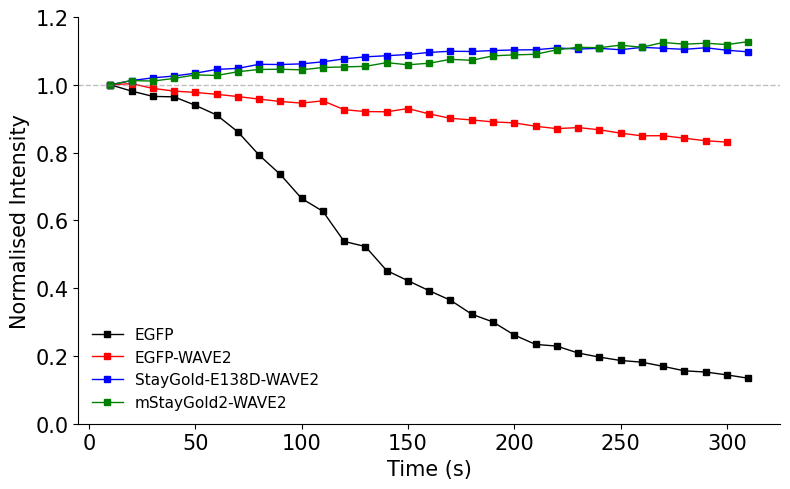

In [5]:
# Representative Photobleaching Profiles of EGFP and StayGold Variants Over 300 Seconds
cell_ids = ['101', '51', '24', '12']
colors = ['black', 'red', 'blue', 'green'] 
labels = ['EGFP', 'EGFP-WAVE2', 'StayGold-E138D-WAVE2', 'mStayGold2-WAVE2']

# Timeline 300 seconds
time_seconds_full = [i * (5 * 60 / 30) for i in range(1, 32)]
at_per_columns = [f"AT{i}Per" for i in range(1, 32)]

# Creat plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Loop over
for cell_id, color, label in zip(cell_ids, colors, labels):
    cell_data = AreaIntensity[AreaIntensity['CellNo'] == cell_id].reset_index(drop=True)
    if cell_data.empty:
        print(f"Warning: Cell {cell_id} not found.")
        continue
    
    intensities = cell_data.loc[0, at_per_columns].values.astype(float)
    
    # remove NaN
    time_seconds = [t for t, i in zip(time_seconds_full, intensities) if pd.notna(i)]
    intensities = [i for i in intensities if pd.notna(i)]
    
    # Plotting
    ax.plot(time_seconds, intensities, marker='s', color=color, linewidth=1, markersize=5, label=label)


# Adding y=1
ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.5)  
    
# Finalisation
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Normalised Intensity", fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.set_ylim(0, 1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
ax.legend(fontsize=11, loc='lower left', frameon=False)

plt.tight_layout()
plt.savefig("SVG/Four_Cells_Comparison.png", dpi=600, bbox_inches='tight', transparent=True)
plt.show()